# Handwritten Digits

## Import Librairies

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
import seaborn as sn
import keras
from keras.utils import np_utils
import tensorflow as tf
import requests
from sklearn.metrics import classification_report

In [2]:
#to import data set
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

## Load and discover Data 

In [3]:
#load train set and test set
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
#check shapes
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


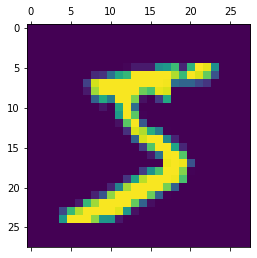

In [5]:
plt.matshow(X_train[0])

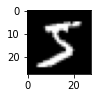

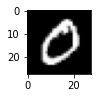

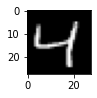

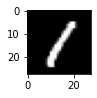

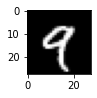

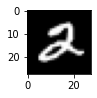

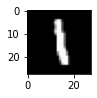

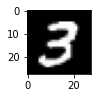

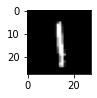

In [6]:
#plot digits
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

### Reshape data 

In [7]:
#redimentionner les shapes 
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)
X_test_flat = X_test.reshape((X_test.shape[0], -1))
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


In [8]:
#Converting the output of y_train and y_test to one hot encoded for cross-entropy loss using keras.
Y_train_flat = keras.utils.np_utils.to_categorical(Y_train, 10)
Y_test_flat = keras.utils.np_utils.to_categorical(Y_test, 10)

#### Explorez et testez différentes combinaisons d’architectures et d'hyper-paramètres du PMC. Prenez soin de comparer vos modèles et notez les meilleurs résultats.

In [9]:
'''Fonction pour afficher l'accuracy et la courbe loss'''
def plot_loss(history):
    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')

    plt.subplot(2,1,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.tight_layout()


#### Test 1: 
Test avec une seule couche cachée

In [10]:
# Sequential create a stack of layers
model1 = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

In [11]:
# Optimizer will help in backproagation to reach better global optima
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
# Does the training
history1 = model1.fit(X_train_flat, Y_train, epochs=3, validation_data=(X_test_flat, Y_test))

Epoch 1/3
1875/1875 [==============================] - 26s 13ms/step - loss: 9.6220 - accuracy: 0.8410 - val_loss: 6.2863 - val_accuracy: 0.8790
Epoch 2/3
1875/1875 [==============================] - 24s 13ms/step - loss: 6.1374 - accuracy: 0.8774 - val_loss: 6.8354 - val_accuracy: 0.8708
Epoch 3/3
1875/1875 [==============================] - 17s 9ms/step - loss: 5.7340 - accuracy: 0.8835 - val_loss: 6.5182 - val_accuracy: 0.8722


In [13]:
model1.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 6.5182 - accuracy: 0.8722


[6.518230438232422, 0.8722000122070312]

In [14]:
y_pred1 = model1.predict(X_test_flat)
Y_pred1_labels = [np.argmax(i) for i in y_pred1]

313/313 [==============================] - 4s 11ms/step


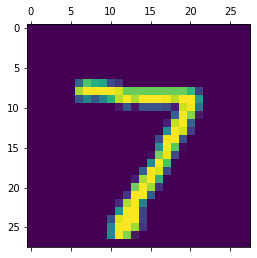

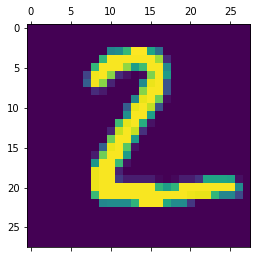

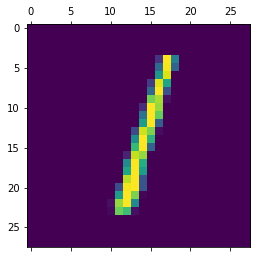

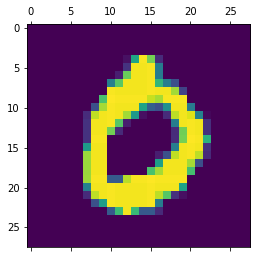

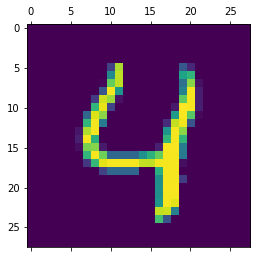

In [15]:
for i in range(5):
    plt.matshow(X_test[i])

In [16]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred1_labels)

Text(69.0, 0.5, 'Truth')

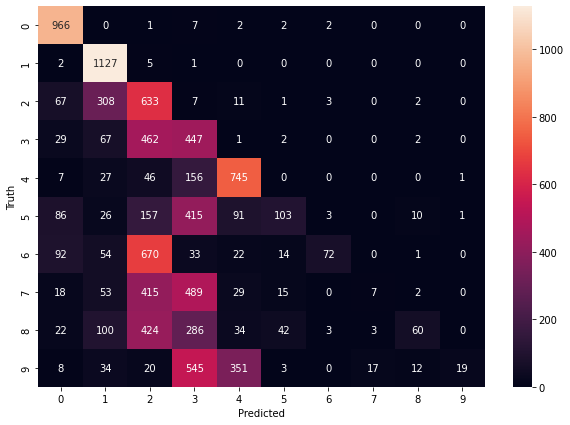

In [17]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

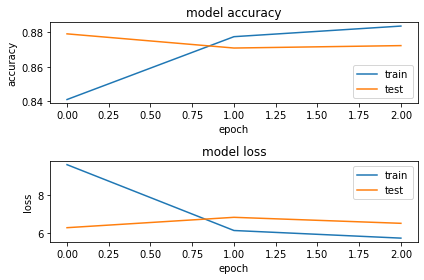

In [18]:
plot_loss(history1)

In [19]:
print(classification_report(Y_test, Y_pred1_labels))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       980
           1       0.63      0.99      0.77      1135
           2       0.22      0.61      0.33      1032
           3       0.19      0.44      0.26      1010
           4       0.58      0.76      0.66       982
           5       0.57      0.12      0.19       892
           6       0.87      0.08      0.14       958
           7       0.26      0.01      0.01      1028
           8       0.67      0.06      0.11       974
           9       0.90      0.02      0.04      1009

    accuracy                           0.42     10000
   macro avg       0.56      0.41      0.34     10000
weighted avg       0.56      0.42      0.34     10000



#### Test 2

In [20]:
# Sequential create a stack of layers
model2 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='ReLU')
])

In [21]:
# Optimizer will help in backproagation to reach better global optima
model2.compile(
#    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [22]:
# Does the training
history2 = model2.fit(X_train_flat, Y_train, epochs=20, validation_data=(X_test_flat, Y_test))

Epoch 1/20
1875/1875 [==============================] - 19s 9ms/step - loss: 2.9960 - accuracy: 0.1130 - val_loss: 2.3535 - val_accuracy: 0.1430
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 2.3157 - accuracy: 0.1430 - val_loss: 2.3070 - val_accuracy: 0.1473
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 2.2769 - accuracy: 0.1567 - val_loss: 2.2352 - val_accuracy: 0.1422
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 2.2331 - accuracy: 0.1661 - val_loss: 2.2235 - val_accuracy: 0.1711
Epoch 5/20
1875/1875 [==============================] - 16s 9ms/step - loss: 2.2630 - accuracy: 0.1848 - val_loss: 2.2160 - val_accuracy: 0.1565
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 2.2048 - accuracy: 0.1749 - val_loss: 2.1944 - val_accuracy: 0.1736
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 2.2745 - accuracy: 0.1992 - val_loss: 2.2028 - val_ac

In [23]:
y_pred2 = model2.predict(X_test_flat)
Y_pred2_labels = [np.argmax(i) for i in y_pred2]

313/313 [==============================] - 3s 8ms/step


In [24]:
model2.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 2.1346 - accuracy: 0.2501


[2.1345772743225098, 0.2500999867916107]

Text(69.0, 0.5, 'Truth')

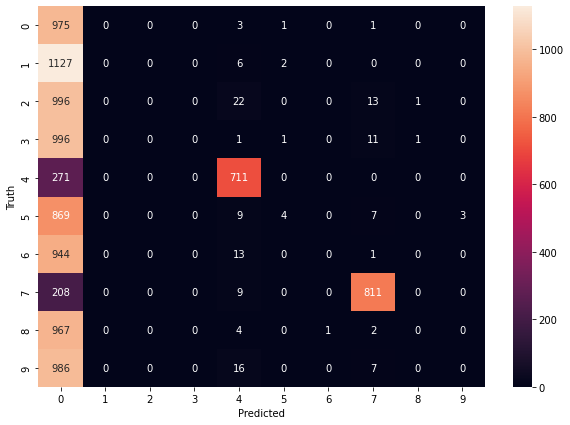

In [25]:
cm2 = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred2_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

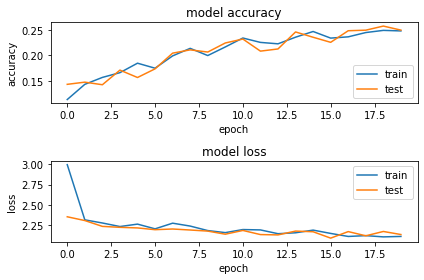

In [26]:
plot_loss(history2)

In [27]:
print(classification_report(Y_test, Y_pred2_labels))

              precision    recall  f1-score   support

           0       0.12      0.99      0.21       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.90      0.72      0.80       982
           5       0.50      0.00      0.01       892
           6       0.00      0.00      0.00       958
           7       0.95      0.79      0.86      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.25     10000
   macro avg       0.25      0.25      0.19     10000
weighted avg       0.24      0.25      0.19     10000



/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Test 3

In [28]:
# Sequential create a stack of layers
model3 = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='ReLU'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [29]:
# Optimizer will help in backproagation to reach better global optima
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [30]:
# Does the training
history3 = model3.fit(X_train_flat, Y_train, epochs=20, validation_data=(X_test_flat, Y_test))

Epoch 1/20
1875/1875 [==============================] - 23s 11ms/step - loss: 2.3458 - accuracy: 0.2066 - val_loss: 1.9874 - val_accuracy: 0.2357
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 1.8766 - accuracy: 0.2705 - val_loss: 1.7961 - val_accuracy: 0.2968
Epoch 3/20
1875/1875 [==============================] - 21s 11ms/step - loss: 1.7949 - accuracy: 0.2942 - val_loss: 1.7667 - val_accuracy: 0.3031
Epoch 4/20
1875/1875 [==============================] - 34s 18ms/step - loss: 1.7573 - accuracy: 0.3001 - val_loss: 1.7785 - val_accuracy: 0.3007
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 1.7371 - accuracy: 0.3037 - val_loss: 1.7161 - val_accuracy: 0.3217
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 1.6673 - accuracy: 0.3396 - val_loss: 1.6270 - val_accuracy: 0.3572
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 1.5821 - accuracy: 0.3684 - val_loss: 1.5523 - v

In [31]:
y_pred3 = model3.predict(X_test_flat)
Y_pred3_labels = [np.argmax(i) for i in y_pred3]

313/313 [==============================] - 3s 8ms/step


In [32]:
model3.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.6748 - accuracy: 0.7872


[0.6748174428939819, 0.7871999740600586]

Text(69.0, 0.5, 'Truth')

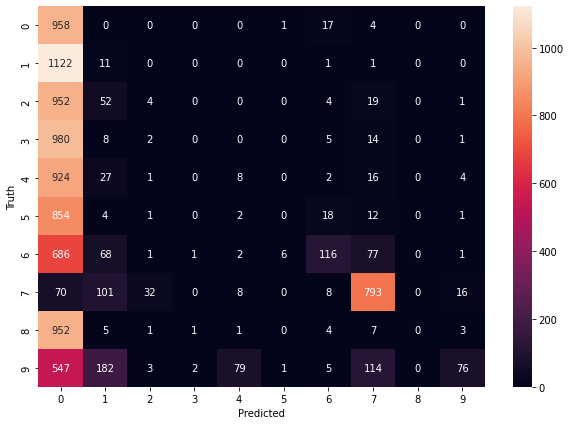

In [33]:
cm3 = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred3_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

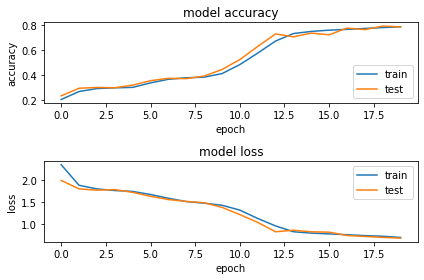

In [34]:
plot_loss(history3)

In [35]:
print(classification_report(Y_test, Y_pred3_labels))

              precision    recall  f1-score   support

           0       0.12      0.98      0.21       980
           1       0.02      0.01      0.01      1135
           2       0.09      0.00      0.01      1032
           3       0.00      0.00      0.00      1010
           4       0.08      0.01      0.01       982
           5       0.00      0.00      0.00       892
           6       0.64      0.12      0.20       958
           7       0.75      0.77      0.76      1028
           8       0.00      0.00      0.00       974
           9       0.74      0.08      0.14      1009

    accuracy                           0.20     10000
   macro avg       0.24      0.20      0.13     10000
weighted avg       0.24      0.20      0.14     10000



/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Test 4

In [36]:
from keras.models import Sequential
from keras.layers import Activation, Dense

In [37]:
model4 = Sequential()


model4.add(Dense(10, input_shape=(784,)))
model4.add(Dense(10, activation='sigmoid'))
model4.add(Dense(10, activation='sigmoid'))

# Impression d'une description du réseau
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [38]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
history4 = model4.fit(X_train_flat, Y_train, epochs=5, batch_size= 50, verbose=2, validation_data=(X_test_flat, Y_test))

Epoch 1/5
1200/1200 - 18s - loss: 1.3655 - accuracy: 0.6092 - val_loss: 1.0111 - val_accuracy: 0.7131 - 18s/epoch - 15ms/step
Epoch 2/5
1200/1200 - 10s - loss: 0.8969 - accuracy: 0.7330 - val_loss: 0.7891 - val_accuracy: 0.7590 - 10s/epoch - 8ms/step
Epoch 3/5
1200/1200 - 9s - loss: 0.7524 - accuracy: 0.7613 - val_loss: 0.7017 - val_accuracy: 0.7612 - 9s/epoch - 7ms/step
Epoch 4/5
1200/1200 - 8s - loss: 0.6780 - accuracy: 0.7955 - val_loss: 0.6449 - val_accuracy: 0.8155 - 8s/epoch - 7ms/step
Epoch 5/5
1200/1200 - 11s - loss: 0.6249 - accuracy: 0.8146 - val_loss: 0.5863 - val_accuracy: 0.8217 - 11s/epoch - 9ms/step


In [40]:
y_pred4 = model4.predict(X_test_flat)
Y_pred4_labels = [np.argmax(i) for i in y_pred4]

313/313 [==============================] - 2s 6ms/step


In [41]:
model4.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.5863 - accuracy: 0.8217


[0.5863394737243652, 0.8216999769210815]

Text(69.0, 0.5, 'Truth')

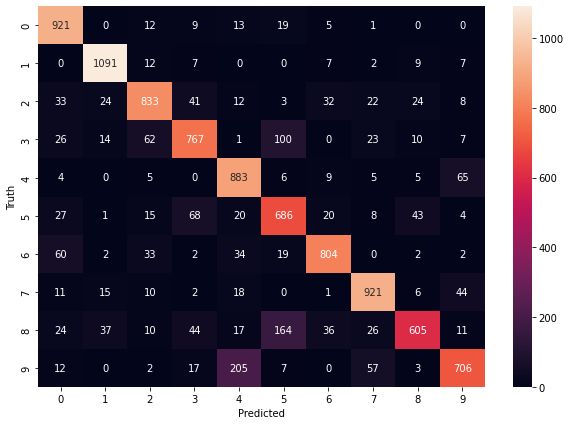

In [42]:
cm4 = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred4_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm4, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

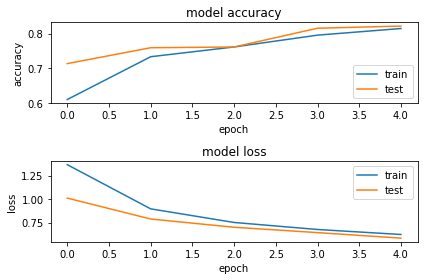

In [43]:
plot_loss(history4)

In [44]:
print(classification_report(Y_test, Y_pred4_labels))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       980
           1       0.92      0.96      0.94      1135
           2       0.84      0.81      0.82      1032
           3       0.80      0.76      0.78      1010
           4       0.73      0.90      0.81       982
           5       0.68      0.77      0.72       892
           6       0.88      0.84      0.86       958
           7       0.86      0.90      0.88      1028
           8       0.86      0.62      0.72       974
           9       0.83      0.70      0.76      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



#### Après l’utilisation d’une couche dense, les données sont transformées. Cela à souvent pour effet de produire des valeurs totalement dispersées. Remédiez à ce problème en ajoutant une couche de normalisation.

In [45]:
from tensorflow.keras.layers import BatchNormalization

In [46]:
model5 = Sequential()


model5.add(Dense(30, input_shape=(784,)))
model5.add(Dense(30, activation='sigmoid'))
model5.add(BatchNormalization())
model5.add(Dense(10, activation='sigmoid'))


# Impression d'une description du réseau
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                23550     
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
Total params: 24,910
Trainable params: 24,850
Non-trainable params: 60
_________________________________________________________________


In [47]:
model5.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
history5 = model5.fit(X_train_flat, Y_train, epochs=50, batch_size= 50, verbose=2,validation_data=(X_test_flat, Y_test))

Epoch 1/50
1200/1200 - 16s - loss: 0.8774 - accuracy: 0.7253 - val_loss: 0.5746 - val_accuracy: 0.8262 - 16s/epoch - 14ms/step
Epoch 2/50
1200/1200 - 13s - loss: 0.5664 - accuracy: 0.8283 - val_loss: 0.5721 - val_accuracy: 0.8197 - 13s/epoch - 11ms/step
Epoch 3/50
1200/1200 - 11s - loss: 0.5394 - accuracy: 0.8377 - val_loss: 0.4684 - val_accuracy: 0.8517 - 11s/epoch - 9ms/step
Epoch 4/50
1200/1200 - 10s - loss: 0.5041 - accuracy: 0.8477 - val_loss: 0.4620 - val_accuracy: 0.8665 - 10s/epoch - 8ms/step
Epoch 5/50
1200/1200 - 11s - loss: 0.4975 - accuracy: 0.8494 - val_loss: 0.4644 - val_accuracy: 0.8583 - 11s/epoch - 9ms/step
Epoch 6/50
1200/1200 - 12s - loss: 0.4605 - accuracy: 0.8618 - val_loss: 0.4618 - val_accuracy: 0.8547 - 12s/epoch - 10ms/step
Epoch 7/50
1200/1200 - 12s - loss: 0.4474 - accuracy: 0.8658 - val_loss: 0.4042 - val_accuracy: 0.8745 - 12s/epoch - 10ms/step
Epoch 8/50
1200/1200 - 13s - loss: 0.4572 - accuracy: 0.8625 - val_loss: 0.4411 - val_accuracy: 0.8685 - 13s/epoch

In [49]:
model5.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.3752 - accuracy: 0.8855


[0.37517857551574707, 0.8855000138282776]

In [50]:
y_pred5 = model5.predict(X_test_flat)
Y_pred5_labels = [np.argmax(i) for i in y_pred5]

313/313 [==============================] - 3s 8ms/step


Text(69.0, 0.5, 'Truth')

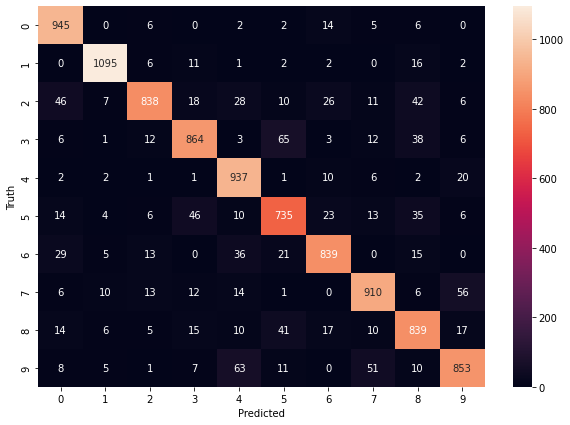

In [51]:
cm5 = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred5_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm5, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

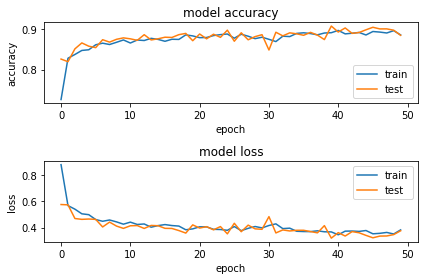

In [52]:
plot_loss(history5)

In [53]:
print(classification_report(Y_test, Y_pred5_labels))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       980
           1       0.96      0.96      0.96      1135
           2       0.93      0.81      0.87      1032
           3       0.89      0.86      0.87      1010
           4       0.85      0.95      0.90       982
           5       0.83      0.82      0.83       892
           6       0.90      0.88      0.89       958
           7       0.89      0.89      0.89      1028
           8       0.83      0.86      0.85       974
           9       0.88      0.85      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000



In [54]:
#Model 5 Without optimizer 
model7 = Sequential()


model7.add(Dense(30, input_shape=(784,)))
model7.add(Dense(30, activation='sigmoid'))
model7.add(BatchNormalization())
model7.add(Dense(10, activation='sigmoid'))


# Impression d'une description du réseau
model7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                23550     
                                                                 
 dense_11 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_1 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 10)                310       
                                                                 
Total params: 24,910
Trainable params: 24,850
Non-trainable params: 60
_________________________________________________________________


In [55]:
model7.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
history7 = model5.fit(X_train_flat, Y_train, epochs=50, batch_size= 50, verbose=0,validation_data=(X_test_flat, Y_test))

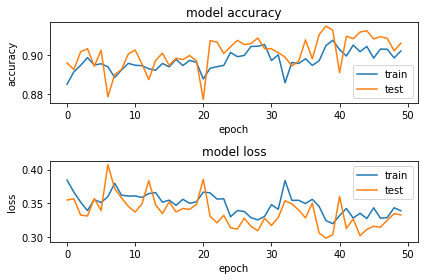

In [57]:
plot_loss(history7)

In [58]:
y_pred7 = model7.predict(X_test_flat)
Y_pred7_labels = [np.argmax(i) for i in y_pred7]

313/313 [==============================] - 2s 6ms/step


In [59]:
print(classification_report(Y_test, Y_pred7_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.09      0.67      0.16      1135
           2       0.22      0.04      0.07      1032
           3       0.00      0.00      0.00      1010
           4       0.05      0.01      0.02       982
           5       0.07      0.03      0.04       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.03      0.00      0.00       974
           9       0.06      0.02      0.03      1009

    accuracy                           0.09     10000
   macro avg       0.05      0.08      0.03     10000
weighted avg       0.05      0.09      0.03     10000



/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Surveillez le surapprentissage de vos modèles en visualisant la loss en fonction des epochs. Qu’est ce que le Early stopping ? S’il y a du surapprentissage, utilisez des couches de régularisation.

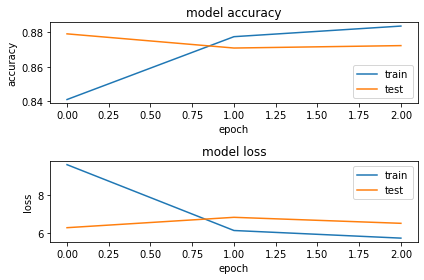

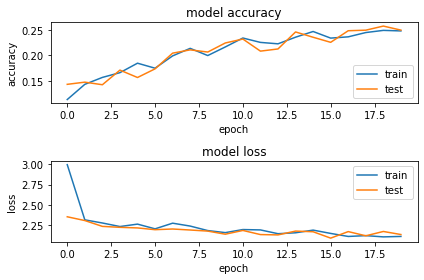

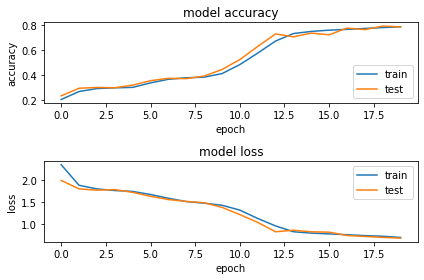

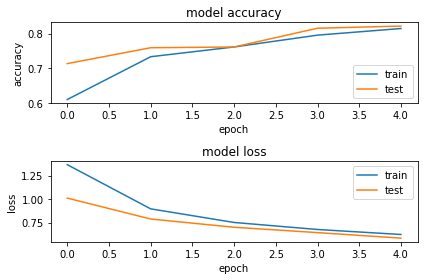

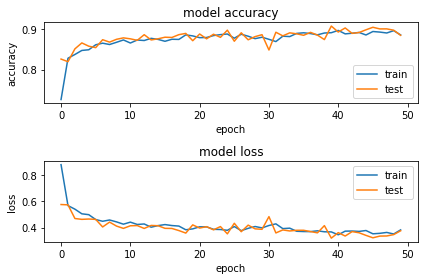

In [60]:
histories = [history1, history2, history3, history4, history5]
for history in histories:
    plot_loss(history)
    history

**Early stoping** est un callback à rajouter pour controler l'entrainement du modèle en fonction de l'évolution d'une metric donnée. 


In [61]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.

In [62]:
model6 = Sequential()


model6.add(Dense(30, input_shape=(784,)))
model6.add(Dense(30, activation='sigmoid'))
model6.add(BatchNormalization())
model6.add(Dense(10, activation='sigmoid'))

# Impression d'une description du réseau
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                23550     
                                                                 
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 batch_normalization_2 (Batc  (None, 30)               120       
 hNormalization)                                                 
                                                                 
 dense_15 (Dense)            (None, 10)                310       
                                                                 
Total params: 24,910
Trainable params: 24,850
Non-trainable params: 60
_________________________________________________________________


In [63]:
model6.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [64]:
history6 = model6.fit(X_train_flat, Y_train, epochs=50, batch_size= 50,validation_data=(X_test_flat, Y_test), 
                     callbacks=[callback],verbose=0)

In [65]:
len(history6.history['loss'])

9

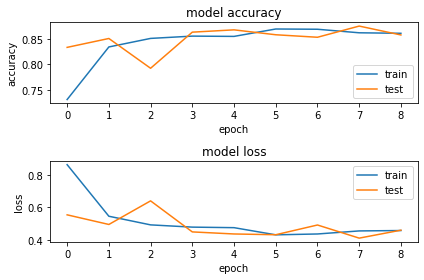

In [66]:
plot_loss(history6)

In [67]:
metrics6 = model6.evaluate(X_test_flat, Y_test)

313/313 [==============================] - 5s 12ms/step - loss: 0.4598 - accuracy: 0.8575


In [68]:
y_pred6 = model6.predict(X_test_flat)
Y_pred6_labels = [np.argmax(i) for i in y_pred6]

313/313 [==============================] - 2s 6ms/step


Text(69.0, 0.5, 'Truth')

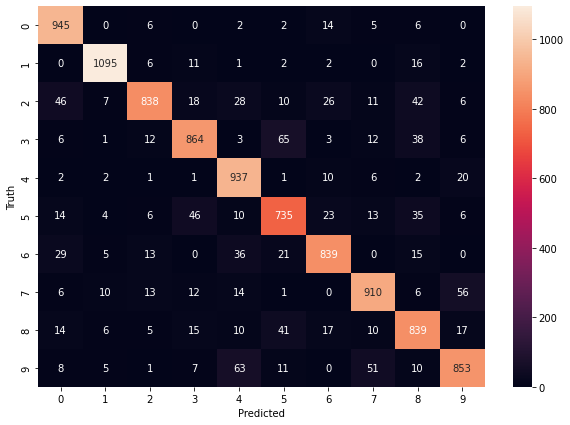

In [69]:
cm6 = tf.math.confusion_matrix(labels=Y_test, predictions=Y_pred6_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm5, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
print(classification_report(Y_test, Y_pred6_labels))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       980
           1       0.94      0.97      0.96      1135
           2       0.95      0.82      0.88      1032
           3       0.88      0.82      0.85      1010
           4       0.85      0.86      0.85       982
           5       0.73      0.80      0.77       892
           6       0.93      0.89      0.91       958
           7       0.77      0.92      0.84      1028
           8       0.80      0.84      0.82       974
           9       0.85      0.69      0.76      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



#### Évaluez vos modèles avec différentes métriques de classification (matrice de confusion et rapport de classification).

In [71]:
predictions = [Y_pred1_labels, Y_pred2_labels, Y_pred3_labels, Y_pred4_labels, Y_pred5_labels]
for pred in predictions:
    y_pred=pred
    print("***********************")
    print(classification_report(Y_test, y_pred))#, target_names=target_names))


***********************
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       980
           1       0.63      0.99      0.77      1135
           2       0.22      0.61      0.33      1032
           3       0.19      0.44      0.26      1010
           4       0.58      0.76      0.66       982
           5       0.57      0.12      0.19       892
           6       0.87      0.08      0.14       958
           7       0.26      0.01      0.01      1028
           8       0.67      0.06      0.11       974
           9       0.90      0.02      0.04      1009

    accuracy                           0.42     10000
   macro avg       0.56      0.41      0.34     10000
weighted avg       0.56      0.42      0.34     10000

***********************
              precision    recall  f1-score   support

           0       0.12      0.99      0.21       980
           1       0.00      0.00      0.00      1135
           2       0.00      0

/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wiem/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/w

              precision    recall  f1-score   support

           0       0.12      0.98      0.21       980
           1       0.02      0.01      0.01      1135
           2       0.09      0.00      0.01      1032
           3       0.00      0.00      0.00      1010
           4       0.08      0.01      0.01       982
           5       0.00      0.00      0.00       892
           6       0.64      0.12      0.20       958
           7       0.75      0.77      0.76      1028
           8       0.00      0.00      0.00       974
           9       0.74      0.08      0.14      1009

    accuracy                           0.20     10000
   macro avg       0.24      0.20      0.13     10000
weighted avg       0.24      0.20      0.14     10000

***********************
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       980
           1       0.92      0.96      0.94      1135
           2       0.84      0.81      0.82      1032


#### Concluez sur cette première tentative. Quel est le modèle construit générant le taux d’erreurs le plus bas ?

In [72]:
models = [model1, model2, model3, model4, model5, model6, model7]
accuracy = []
loss = []
for model in models:
    metric = model.evaluate(X_test_flat, Y_test)
    accuracy.append(metric[1])
    loss.append(metric[0])

313/313 [==============================] - 6s 14ms/step - loss: 2.8089 - accuracy: 0.0871


In [73]:
models[accuracy.index(max(accuracy))].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                23550     
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
Total params: 24,910
Trainable params: 24,850
Non-trainable params: 60
_________________________________________________________________


In [74]:
models[loss.index(min(loss))].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                23550     
                                                                 
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
Total params: 24,910
Trainable params: 24,850
Non-trainable params: 60
_________________________________________________________________
